In [1]:
using Plots; gr()
using Reproduce
using FileIO
using Statistics
using ProgressMeter
using JLD2
data_home = "../data/OneDTMaze_GPI_Control_Part_1"

┌ Warning: Error requiring `HDF5` from `Plots`
│   exception = (LoadError("/home/matthewmcleod/.julia/packages/Plots/kyYZF/src/backends/hdf5.jl", 162, UndefVarError(:Group)), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007f236565d73f, Ptr{Nothing} @0x00007f23656ee08c, Ptr{Nothing} @0x00007f23656ee5d5, Ptr{Nothing} @0x00007f23656ee23f, Ptr{Nothing} @0x00007f23656eec43, Ptr{Nothing} @0x00007f23656efea7, Base.InterpreterIP in top-level CodeInfo for Plots._hdf5_implementation at statement 4, Ptr{Nothing} @0x00007f236570d129, Ptr{Nothing} @0x00007f236570d8a2, Ptr{Nothing} @0x00007f236570cc8a, Ptr{Nothing} @0x00007f236570cc29, Ptr{Nothing} @0x00007f23656df905, Ptr{Nothing} @0x00007f236570e6d1, Ptr{Nothing} @0x00007f23573ea0bd, Ptr{Nothing} @0x00007f233547c3be, Ptr{Nothing} @0x00007f23656d4e27, Ptr{Nothing} @0x00007f23656ee5f5, Ptr{Nothing} @0x00007f23656ee23f, Ptr{Nothing} @0x00007f23656eec43, Ptr{Nothing} @0x00007f23656efea7, Base.InterpreterIP in top-level CodeInfo for Plots 

"../data/OneDTMaze_GPI_Control_Part_1"

In [2]:
include("./plot_utils.jl")
GPU = GeneralPlotUtils
experiment_folders = [data_home]

1-element Array{String,1}:
 "../data/OneDTMaze_GPI_Control_Part_1"

In [3]:
ic = ItemCollection(joinpath(experiment_folders[1], "data"));
ic = search(ic, Dict("env_step_penalty" => -0.01))
diff(ic)

Dict{String,Array} with 11 entries:
  "behaviour_learner"          => ["GPI", "Q"]
  "demon_eta"                  => [0.0008, 0.0016, 0.004, 0.008, 0.02, 0.04, 0.…
  "behaviour_reward_projector" => ["base", "ideal_martha"]
  "demon_learner"              => ["Q", "SR"]
  "behaviour_update"           => ["ESARSA", "TB"]
  "eta"                        => [0.0008, 0.0016, 0.004, 0.008, 0.02, 0.04, 0.…
  "save_dir"                   => ["OneDTMaze_ESARSA_Control_No_Penalty/data", …
  "behaviour_eta"              => [0.0016, 0.008, 0.04, 0.2]
  "demon_alpha_init"           => [0.05, 0.1]
  "demon_opt"                  => ["Auto", "Descent"]
  "seed"                       => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

In [4]:
algo_divisor_keys = ["behaviour_learner","demon_learner"]
sweep_params = ["eta"]

algo_specs_full = GPU.split_algo(ic, algo_divisor_keys)

["behaviour_learner", "demon_learner"]


4-element Array{Any,1}:
 Dict{Any,Any}("demon_learner" => "Q","behaviour_learner" => "GPI")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_learner" => "GPI")
 Dict{Any,Any}("demon_learner" => "Q","behaviour_learner" => "Q")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_learner" => "Q")

In [5]:
all_algos_ics = [search(ic,algo_spec) for algo_spec in algo_specs_full]
valid_algos_ind = findall(a -> length(a) != 0, all_algos_ics)

algo_specs = algo_specs_full[valid_algos_ind]
algo_ics = all_algos_ics[valid_algos_ind]

4-element Array{ItemCollection,1}:
 ItemCollection(Size: 80, Dir Hash: 0)
 ItemCollection(Size: 80, Dir Hash: 0)
 ItemCollection(Size: 160, Dir Hash: 0)
 ItemCollection(Size: 160, Dir Hash: 0)

In [6]:
best_per_algo_ics = []
for (i,algo_ic) in enumerate(algo_ics)
    push!(best_per_algo_ics, GPU.get_best_final_perf(algo_ic,sweep_params, :oned_tmaze_start_error, 0.1))

end

["eta"]
[2.3823821127728992, 2.0966360591288256, 2.166578066210165, 2.151702744010728]
["eta"]
[2.011717564447684, 2.035077048629086, 2.431912815954784, 2.064477461959777]
["eta"]
[2.8682500012221936, 1.9247396660548588, 2.676889940975641, 1.6126250952643055, 1.8377541112850724, 1.662156946015526, 2.359402822951635, 1.6625568633583965]
["eta"]
[3.4105579824752756, 1.9334036166265458, 2.429061755021097, 2.0560063629466425, 2.141998580543325, 1.3989674714003992, 2.2064113192639203, 1.1323330216684804]


In [29]:
const SEED = 5
run_ic = search(best_per_algo_ics[2], Dict("seed" => SEED))
gvf_labels = ["Distractor", "Constant", "Drifter", "Constant"]

4-element Array{String,1}:
 "Distractor"
 "Constant"
 "Drifter"
 "Constant"

In [40]:
wc = GPU.load_results(run_ic,:intrinsic_reward)
max_q = GPU.load_results(run_ic,:max_behaviour_q)

60000×1×1 Array{Float64,3}:
[:, :, 1] =
 2591.198
 2590.3959999999997
 2589.6733638343494
 2588.8713638343497
 2575.308967015185
 2574.589944030363
 2573.831390017829
 2585.7823618269567
 2572.349842760292
 2548.6814666760197
 2548.039247871023
 2545.3986516891327
 2544.7534834108783
    ⋮
  -11.833862614643865
  -10.639010494953094
  -11.829395565969072
  -10.637320121933158
  -11.825376211485555
  -10.633879739040639
  -10.635781263017364
  -11.821759697013977
  -10.634380503776319
  -11.818505621217174
  -10.633105631121474
  -11.81557767299307

In [41]:
p1 = plot()
l = mean(wc[:,1,:], dims=2)
l = GPU.smooth(l,100)
plot!(l, palette=:tab10, ylim=(0,0.15), label = "")
title!("Intrinsic Reward")
xlabel!("Steps (per 100)")
ylabel!("Intrinsic Reward")

p2 = plot()
plot!(max_q[:,1,:], label="")
title!("Max Q value")
ylabel!("Max Q value")

p3 = plot()
plot!(max_q[:,1,:], ylim=(-5,5), label = "")
title!("Truncated Max Q value")
ylabel!("Max Q value")

plot(p1,p2,p3, layout=(3,1), size=(800,800))

In [42]:
savefig("./plots/onedtmaze_control/run_analysis/intrinsic_and_q_value_$(SEED).png")

In [43]:
goal_visits = GPU.load_results(run_ic,:visit_order)
ep_lengths = GPU.load_results(run_ic, :episode_length)

202×1×1 Array{Int64,3}:
[:, :, 1] =
  467
  106
  176
  117
  232
  131
  310
  312
  146
  222
  144
  113
  219
    ⋮
  293
  454
  616
  499
  169
  105
  290
 1442
  803
 2772
  285
 9169

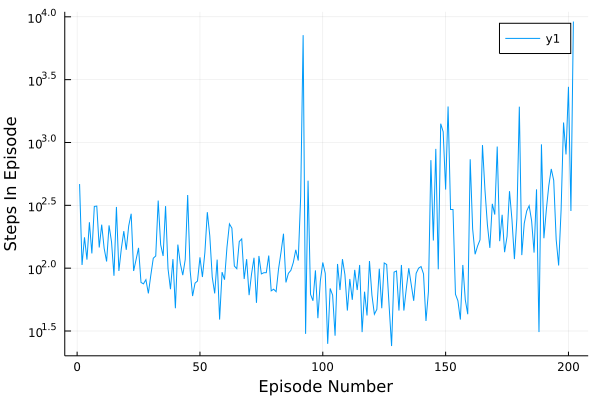

In [44]:
plot(ep_lengths[:,1,1], yaxis=:log)
xlabel!("Episode Number")
ylabel!("Steps In Episode")

In [45]:
savefig("./plots/onedtmaze_control/run_analysis/step_length_$(SEED).png")

In [46]:
function onehot(data, num_gvfs)
    onehot_enc = zeros(num_gvfs, length(data))
    for gvf_i in 1:num_gvfs
        onehot_enc[gvf_i,:] += (data .== gvf_i)
    end
    return onehot_enc
end
function onedconv(data,filter)
    l = length(filter)
    res = zeros(length(data)-l)
    for i in 1:(length(data)-l)
        res[i] = sum(data[i:i+l-1] .* filter)
    end
    return res
end
goals_enc = onehot(goal_visits[:,1,1],4)

4×201 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0     1.0  0.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0     0.0  1.0  0.0  0.0  0.0  0.0  0.0

In [47]:
visits = [onedconv(goals_enc[i,:], ones(10)) for i in 1:4]

4-element Array{Array{Float64,1},1}:
 [3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0  …  7.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0]
 [2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0  …  3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0]

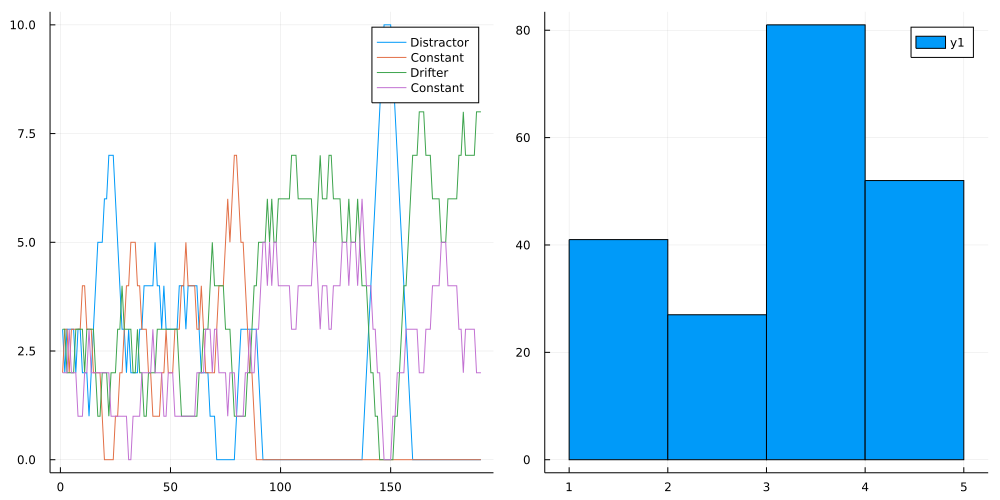

In [48]:
p1 = plot(visits, labels = reshape(gvf_labels,1,4))
p2 = p2 = histogram(goal_visits[:,1,1])
plot(p1,p2, size = (1000,500))

In [49]:
savefig("./plots/onedtmaze_control/run_analysis/terminations_$(SEED).png")

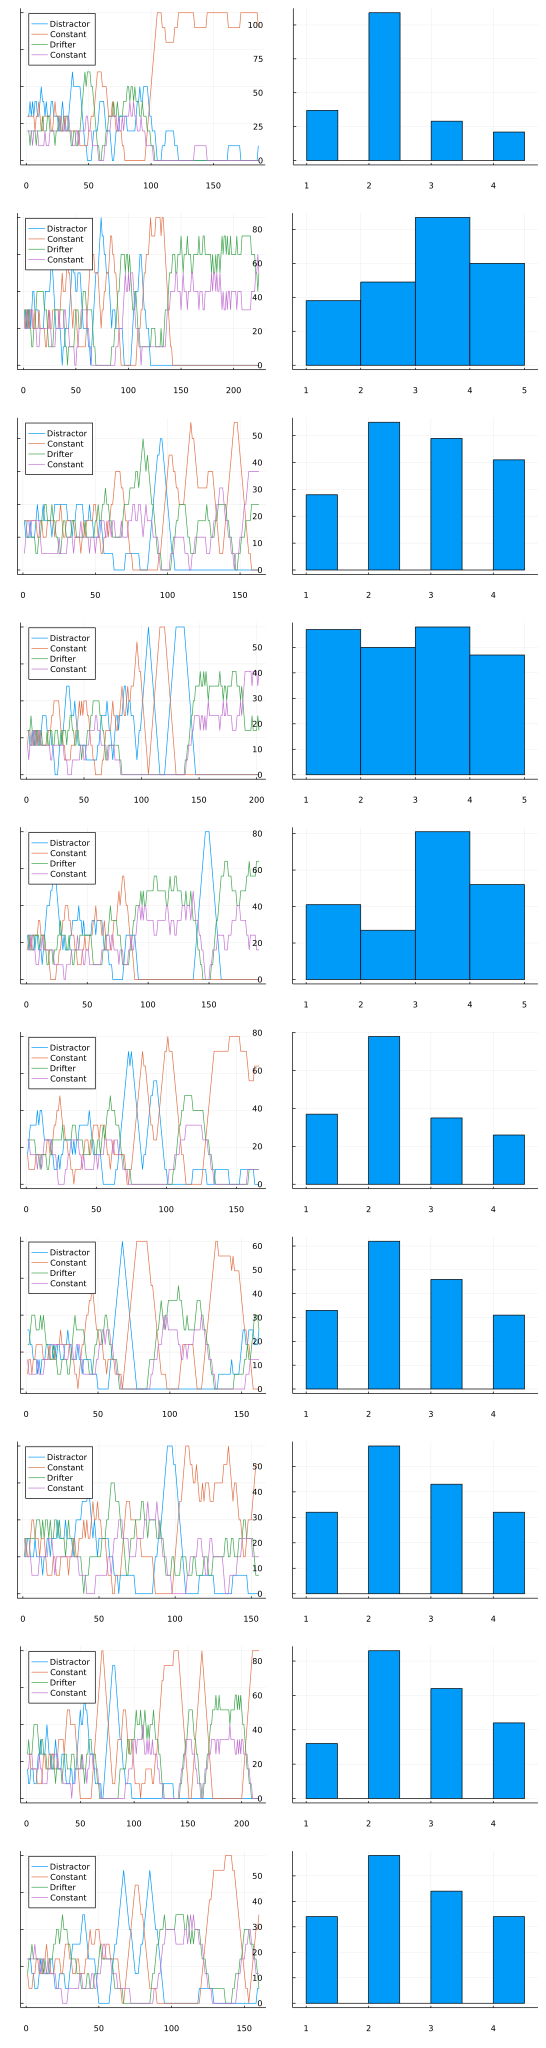

In [58]:
# Plot many different visits
seeds = [1,2,3,4,5,6,7,8,9,10]


ps = []
for s in seeds
    seed_ic = search(best_per_algo_ics[2], Dict("seed" => s))

    goal_visits = GPU.load_results(seed_ic,:visit_order)
    ep_lengths = GPU.load_results(seed_ic, :episode_length)
    goals_enc = onehot(goal_visits[:,1,1],4)
    visits = [onedconv(goals_enc[i,:], ones(10)) for i in 1:4]
    p1 = plot(visits, labels = reshape(gvf_labels,1,4), legend=:topleft)
    p2 = p2 = histogram(goal_visits[:,1,1],label="")
    p = plot(p1,p2, size = (1000,500))
    push!(ps,p)
end
plot(ps..., layout=(10,1), size = (800,3000))

In [59]:
savefig("./plots/onedtmaze_control/run_analysis/visits_varied_seeds.png")